In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, SimpleRNN

In [205]:
df = pd.read_csv('../input/XPEV.csv')

In [206]:
df.shape

(230, 7)

In [207]:
df = df['Close'].values
df = df.reshape(-1, 1)

In [208]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [209]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [211]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [212]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [214]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

IndexError: tuple index out of range

In [171]:
model = Sequential()
model.add(SimpleRNN(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [172]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [173]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [174]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('../out/SimpleRNN/UPS.h5')

Epoch 1/50
5/5 [==============================] - 3s 30ms/step - loss: 0.8215
Epoch 2/50
5/5 [==============================] - 0s 44ms/step - loss: 0.4596
Epoch 3/50
5/5 [==============================] - 0s 29ms/step - loss: 0.3686
Epoch 4/50
5/5 [==============================] - 0s 31ms/step - loss: 0.3523
Epoch 5/50
5/5 [==============================] - 0s 31ms/step - loss: 0.3852
Epoch 6/50
5/5 [==============================] - 0s 32ms/step - loss: 0.3206
Epoch 7/50
5/5 [==============================] - 0s 31ms/step - loss: 0.2987
Epoch 8/50
5/5 [==============================] - 0s 33ms/step - loss: 0.3213
Epoch 9/50
5/5 [==============================] - 0s 34ms/step - loss: 0.3903
Epoch 10/50
5/5 [==============================] - 0s 30ms/step - loss: 0.4701
Epoch 11/50
5/5 [==============================] - 0s 32ms/step - loss: 0.2227
Epoch 12/50
5/5 [==============================] - 0s 35ms/step - loss: 0.2764
Epoch 13/50
5/5 [==============================] - 0s 31ms/st

In [176]:
model = load_model('../out/SimpleRNN/UPS.h5')

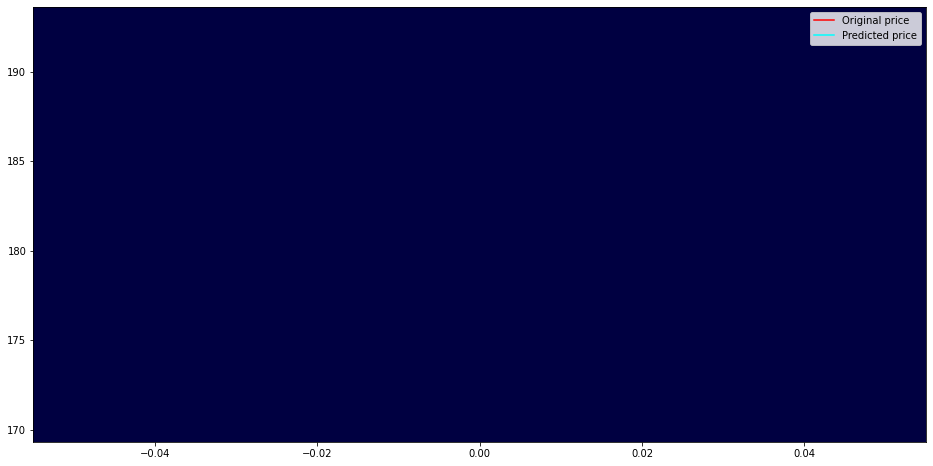

In [177]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()